# FordGoBike Data Visualization
## by Malak Elshenawy

## Investigation Overview

> In this project, we will investigate and understand the relation of member's age group and gender with their bike usage in terms of duration, weekdays and time for each trip.


## Dataset Overview

> In the dataset, there are total 16 columns. Following are the further details about variables:

- 3 columns referring to 3 categorical variables.

    * member_gender (Male, Female, Other)

    * bike_share_for_all_trip (yes, no)

    * user_type (customer, subscriber)

- 10 columns referring to postion, name, id, date and time of the starting and ending stations
- 1 column for bike information(bike_id)
- 1 column for member_birth_year
- 1 column for trip duration(duration_sec)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('ford-clean.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,week_day,hour,member_age,start_time_weekday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17,37.0,NaN
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12,49.0,NaN
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17,32.0,NaN
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23,47.0,NaN
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,Thursday,23,62.0,NaN


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> The subscribers use bikes way more often than regular customers.

<Figure size 841.68x595.44 with 0 Axes>

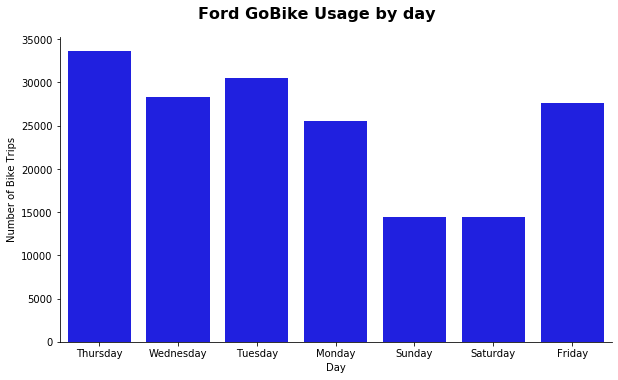

In [21]:
# each week day usage of the Ford Go Bike system
plt.figure(figsize=[ 11.69, 8.27]);

graph = sb.catplot(data = df, x = 'week_day', kind = 'count', palette=sb.color_palette(['blue']),aspect = 1.7);

graph.set_axis_labels('Day', 'Number of Bike Trips');

graph.fig.suptitle('Ford GoBike Usage by day', y = 1.05, fontsize = 16, fontweight = 'bold');


## (Visualization 2)

> There are two categories of users types in the dataset: Customers and Subscribers.Since the majority of the users are subscribers, therefore it was expected that the subscribers rent the bikes more throught the week and less on the week ends. This suggests that they are students or employees that use the bikes as their way of transportation to work/school.

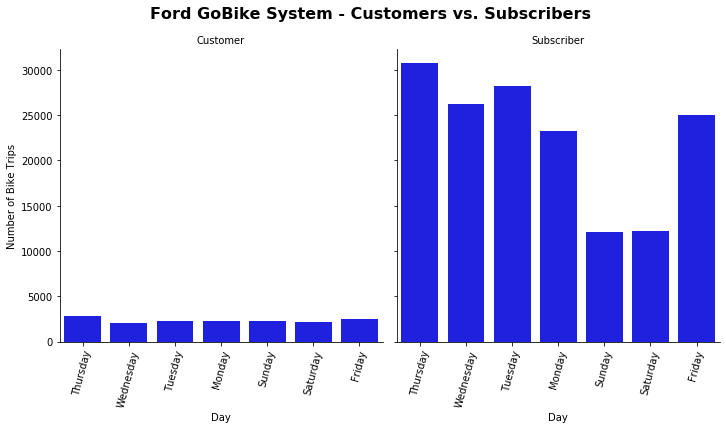

In [22]:

# Customer Usage by Weekday vs. Subscriber Usage by Weekday
graph = sb.catplot(data=df, x='week_day', col="user_type", kind='count', sharey = True,palette=sb.color_palette(['blue']));

graph.set_axis_labels("Day", "Number of Bike Trips");
graph.set_titles("{col_name}");

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

## (Visualization 3)
> The majority of users in both types where males. Their bike usage accross the week was similar with a slightly increase on Thursdays and Fridays.


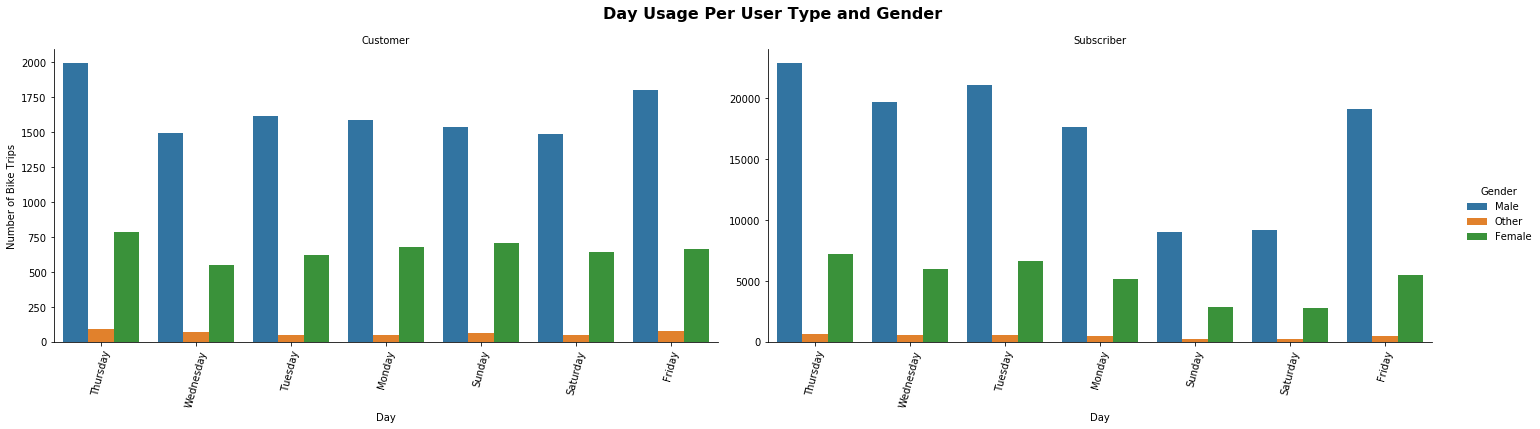

In [23]:
# Day usage - user type and gender
graph = sb.catplot(data=df, x='week_day', col="user_type", hue="member_gender", kind='count', sharey = False, height=5, aspect=2);

graph.set_axis_labels("Day", "Number of Bike Trips")
graph._legend.set_title('Gender')
graph.set_titles("{col_name}")

graph.fig.suptitle('Day Usage Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

In [ ]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --no-input --no-prompt